## NSMC를 딥러닝으로 해보자!

* 불러온 데이터를 품사 태그를 붙여서 토크나이징합니다.

In [1]:
from konlpy.tag import Mecab
from konlpy.tag import Okt
import json
import os
import re
from pprint import pprint

okt = Okt()
mecab = Mecab()

if os.path.exists('train_docs.json'):
    with open("train_docs.json", encoding='utf-8') as f:
        train_data = json.load(f)
else:
    train_data = [(text_tokenizing(text_cleaning(line[1])), line[2]) for line in train_docs if text_tokenizing(line[1])]
    #train_data = [(text_tokenizing(line[1]), line[2]) for line in train_docs if text_tokenizing(line[1])]
    
    with open("train_docs.json", 'w', encoding='utf-8') as f:
        json.dump(train_data, f, ensure_ascii=False, indent='\t')
        
if os.path.exists('test_docs.json'):
    with open("test_docs.json", encoding='utf-8') as f:
        test_data = json.load(f)
else:
    test_data = [(text_tokenizing(text_cleaning(line[1])), line[2]) for line in test_docs if text_tokenizing(line[1])]
    #test_data = [(text_tokenizing(line[1]), line[2]) for line in test_docs if text_tokenizing(line[1])]
    with open("test_docs.json", 'w', encoding='utf-8') as f:
        json.dump(test_data, f, ensure_ascii=False, indent='\t')

pprint(train_data[0])
pprint(test_data[0])

[['진짜', '짜증', '네요', '목소리'], '0']
[[], '0']


In [2]:
print(train_data[:3])

[[['진짜', '짜증', '네요', '목소리'], '0'], [['포스터', '보고', '초딩', '영화', '오버', '연기', '조차', '가볍', '구나'], '1'], [['너무', '밓었다그래서보는것을추천한다'], '0']]


* 데이터 분석을 하기 위해 기본적인 정보들을 확인합니다.

* nltk 라이브러리를 이용하여 전처리를 합니다.

## Deep Neural Network로 분류하기

In [3]:
# 필요한 라이브러리 불러오기


## Set Hyperparameter 

In [4]:
max_words = 
max_len = 
batch_size = 
EPOCHS = 

## Define Network Structure 

In [5]:
class SimpleLSTM(tf.keras.Model):
    def __init__(self):
        
    def __call__(self, x, training=None, mask=None):


## Data Preprocessing 

In [6]:
# SVM 때와 비슷한 형태로 만들고


# keras가 사용하기 위한 형태로 Tokenizing

# LSTM의 input으로 넣기 위한 변환 작업


# 크기를 맞춰주기 위한 zero padding

# 학습 가능한 형태로 최종 변환.


[9, 110, 7, 456]

 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   9 110   7 456]


## Set Model 

In [7]:
# 모델 선언

# 모델 컴파일


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


## Early Stopping Callback

In [8]:
earlystopper = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=10, verbose=1)

## Run Model 

In [9]:
# 실행, 결과 저장.


Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 1157 steps, validate on 386 steps
Epoch 1/4
1157/1157 [==============================] - 94s 81ms/step - loss: 0.4204 - acc: 0.8005 - val_loss: 0.3880 - val_acc: 0.8200
Epoch 2/4
1157/1157 [==============================] - 90s 78ms/step - loss: 0.3403 - acc: 0.8482 - val_loss: 0.3918 - val_acc: 0.8207
Epoch 3/4
1157/1157 [==============================] - 90s 78ms/step - loss: 0.2966 - acc: 0.8689 - val_loss: 0.4192 - val_acc: 0.8202
Epoch 4/4
1157/1157 [==============================] - 90s 78ms/step - loss: 0.2586 - acc: 0.8863 - val_loss: 0.4833 - val_acc: 0.8126


In [10]:
# Model Test


49359/49359 [==============================] - 9s 176us/sample - loss: 0.4833 - acc: 0.8126


In [11]:
print("Test Score: ", score)
print("Test Accuracy: ", acc)

Test Score:  0.48334159288151524
Test Accuracy:  0.8126178


## Loss Visualization 

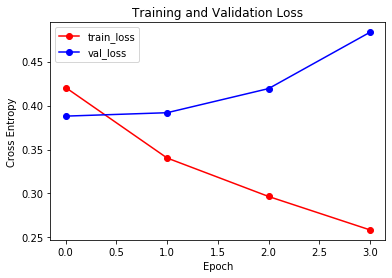

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure()
plt.plot(loss, 'ro-', label="train_loss")
plt.plot(val_loss, 'bo-', label="val_loss")
plt.ylabel('Cross Entropy')
plt.xlabel('Epoch')
plt.legend(loc="best")
plt.title('Training and Validation Loss')
plt.show()

## Save Weight 

In [13]:
# Model weight matrix 저장.
